In [1]:
import pandas as pd

df = pd.read_csv("../Data/spam.csv")
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df[df['label'] == 'spam'].head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [5]:
import matplotlib.pyplot as plt

df['label'].value_counts().to_frame().plot(kind="bar", legend=False)
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
def text_to_lower_case_text(text):
    text = text.lower()
    return text

In [7]:
df['text'] = df['text'].apply(text_to_lower_case_text)
df.head()

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=101)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [10]:
def calc_accuracy(conf_matrix):
    size = conf_matrix.shape[0]
    total = 0
    diag_total = 0
    for i in range(size):
        for j in range(size):
            total += conf_matrix[i][j]
            if i == j:
                diag_total += conf_matrix[i][j]
    return diag_total / total

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train_vec, y_train)
res = model.predict(x_test_vec)

conf_matrix = confusion_matrix(y_test, res)
print(conf_matrix, "\n")
print("Accuracy =", calc_accuracy(conf_matrix))

[[1440   24]
 [  48  160]] 

Accuracy = 0.9569377990430622


In [12]:
test = df.iloc[2000][1]
label = df.iloc[2000][0]
test_vec = vectorizer.transform([test])
test_res = model.predict(test_vec)

In [13]:
print(test)
print(label)
print(test_res[0])

but i'll b going 2 sch on mon. my sis need 2 take smth.
ham
ham


In [14]:
df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham'].iloc[:747, :]
df_evenly_dist = pd.concat([df_spam, df_ham])
df_evenly_dist.head()

,label,text
2,spam,free entry in 2 a wkly comp to win fa cup fina...
5,spam,freemsg hey there darling it's been 3 week's n...
8,spam,winner!! as a valued network customer you have...
9,spam,had your mobile 11 months or more? u r entitle...
11,spam,"six chances to win cash! from 100 to 20,000 po..."


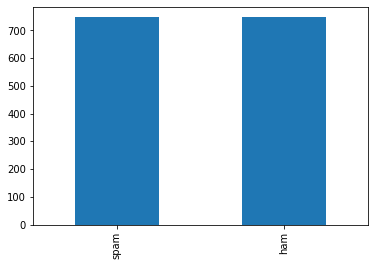

In [15]:
df_evenly_dist['label'].value_counts().to_frame().plot(kind="bar", legend=False)
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_evenly_dist['text'], df_evenly_dist['label'], test_size=0.3, 
                                                    random_state=101)

In [17]:
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [18]:
model = DecisionTreeClassifier()
model.fit(x_train_vec, y_train)
res = model.predict(x_test_vec)

conf_matrix = confusion_matrix(y_test, res)
print(conf_matrix, "\n")
print("Accuracy =", calc_accuracy(conf_matrix))

[[210  13]
 [ 21 205]] 

Accuracy = 0.9242761692650334


In [19]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(df['text']).toarray()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(processed_features_vec, df['label'], test_size=0.3, random_state=101)

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
res = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, res)
print(conf_matrix, "\n")
print("Accuracy =", calc_accuracy(conf_matrix))

[[1449   15]
 [  32  176]] 

Accuracy = 0.97188995215311


In [23]:
from nltk.stem import PorterStemmer 

ps = PorterStemmer()
clear_text = []

for i in range(df.shape[0]):
    text = df['text'][i].lower().split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    clear_text.append(text)

In [24]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(clear_text).toarray()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(processed_features_vec, df['label'], test_size=0.3, random_state=101)

In [26]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
res = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, res)
print(conf_matrix, "\n")
print("Accuracy =", calc_accuracy(conf_matrix))

[[1440   24]
 [  30  178]] 

Accuracy = 0.9677033492822966
